# Prototype Dataset
This file generates the path-to-path dataset to train a prototype transformer

The input output sequence of a logo should consist of 270 Parameters
- DeepSVG Embedding (256)
- a0 Type "EOS" (1)
- a1 - a6 Type (6)
- a7 - a12 Param (6)
- a13 time offset from beginning of animation in seconds

Input Sequence
- In the input sequence, the last 13 Parameters are set to zero
- In a final model, these parameters are aimed to be left out (as context vector isn't based on that)

Output Sequence
- The Output sequence consists of the selected paths represented by their DeepSVG Embedding
- The Animation is represented through the type and the parameters.
- Each output sequence ends with an EOS Token, where the EOS-type in the one-hot-encoded part is set to 1.

## Creating the input data

In [11]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests

file_path = 'data/test/embedded_data/svg_embedding.pkl'

# Open the pickle file for reading in binary mode
with open(file_path, 'rb') as file:
    # Load the data from the pickle file
    data = pickle.load(file)

print(data)

   animation_id         0         1         2         3         4         5  \
0             0 -1.479738  1.499942 -0.460763  0.363093 -0.947988 -1.115443   
1             1  0.813671  0.532380  1.347741  2.284749 -1.111322  0.691359   
2             3  0.604563 -1.073522  0.185603  0.023935 -0.398406  0.546429   
3             2  0.826920 -2.444922  0.851283 -0.252141  0.824601 -0.199929   
0             0 -1.479738  1.499942 -0.460763  0.363093 -0.947988 -1.115443   
..          ...       ...       ...       ...       ...       ...       ...   
6             4 -0.038630  0.348483  0.308243  1.238470  0.105779  0.329120   
0             0 -1.479738  1.499942 -0.460763  0.363093 -0.947988 -1.115443   
1             1 -0.249900  0.912474  0.489277  1.474137 -1.440057 -0.284204   
2             3  0.997545  0.120014  0.713506  0.645377 -0.742112  0.631159   
3             2 -0.600887  1.355175  0.584851  0.903439 -0.382395  0.668843   

           6         7         8  ...       247    

In [12]:
# checking the number of paths 

data['filename'].value_counts()

logo_705.svg     119
logo_1682.svg    110
logo_1584.svg    109
logo_1168.svg     77
logo_1801.svg     76
                ... 
logo_1926.svg      2
logo_1184.svg      2
logo_1558.svg      2
logo_1648.svg      2
logo_702.svg       1
Name: filename, Length: 259, dtype: int64

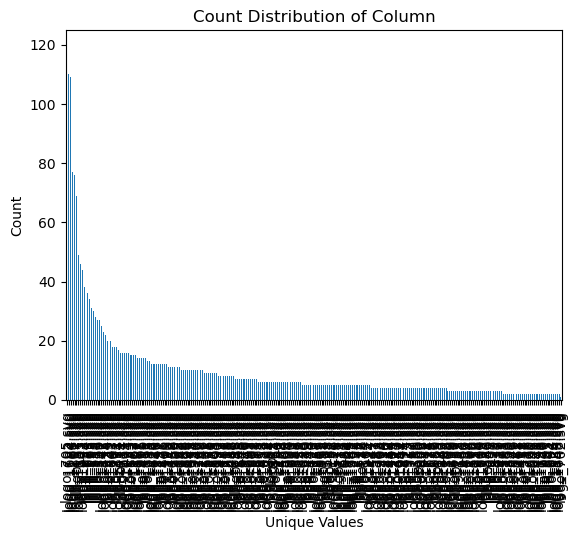

In [13]:
count_distribution = data['filename'].value_counts()
count_distribution.plot(kind='bar')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count Distribution of Column')
plt.show()

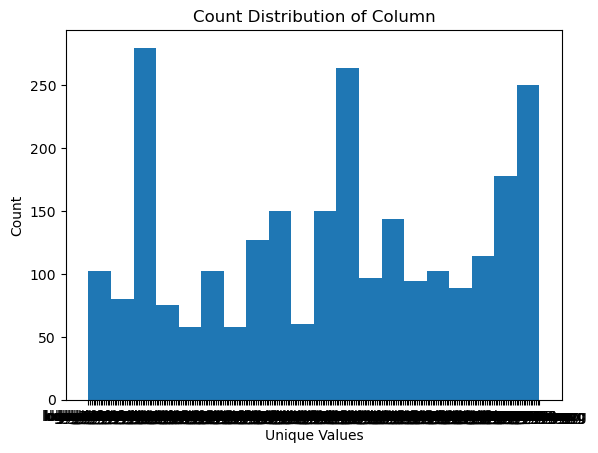

In [14]:
plt.hist(data['filename'], bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count Distribution of Column')
plt.show()

In [15]:
# max number of paths in one logo
data['filename'].value_counts().iloc[0]

119

In [16]:
data[data['filename']=='logo_36.svg']

,animation_id,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,filename
0,0,-1.479738,1.499942,-0.460763,0.363093,-0.947988,-1.115443,1.581553,-0.411030,0.169418,...,1.718860,-0.139441,-1.523274,-1.602520,0.121774,-0.331636,1.083312,1.555735,0.406794,logo_36.svg
1,1,-0.046563,1.268722,0.179298,0.520527,0.102936,0.511308,0.318602,0.652480,-0.204564,...,0.470238,-0.319376,0.230528,0.867940,0.395774,1.336052,0.325830,0.626101,-0.292177,logo_36.svg
2,3,0.078027,-0.885305,0.575409,0.644550,0.071136,1.975846,-0.815557,-0.023037,-0.983261,...,-2.104513,0.376560,1.087818,1.251735,-0.982731,-0.423921,0.295719,-0.759669,-0.560175,logo_36.svg
3,2,0.298474,-1.835696,0.278614,-0.592662,0.103240,0.527570,-0.301879,-0.378880,-0.419961,...,-3.453290,-0.456308,1.361012,0.638535,-0.515345,0.179005,0.714492,-0.504355,-0.210751,logo_36.svg
4,4,0.043930,0.052075,-0.245103,0.936828,-0.281573,1.871222,-1.050934,0.586056,-0.180195,...,-0.875970,-0.431099,0.048782,1.273455,0.410215,-0.542905,0.352429,-1.753664,-0.421086,logo_36.svg


In [17]:
type(data['animation_id'][118])

str

In [18]:
# Read CSV into DataFrame
df = pd.read_csv('data/test/test_rating.csv')

df['id'] = df.index

# separating to rating and animation
animation_df = df[['id','filename','data', "rating"]]

rating_df = df[['id','filename','rating']]


In [19]:
animation_df

,id,filename,data,rating
0,0,logo_1006.svg,"0,0,0,0,0,1,0,0,0,0,0,0,3,-25,-15,-49,46,10.47...",2
1,1,logo_1017.svg,"0,0,0,0,0,1,0,0,0,0,0,0,4,-50,36,-47,-16,19.32...",3
2,2,logo_1026.svg,"0,0,0,0,0,0,0,0,0,0,1,0,2,-9,-1,20,40,0.153773...",1
3,3,logo_1029.svg,"3,0,1,0,0,0,0,0,0,0,0,3,3,-40,11,-40,42,4.1131...",2
4,4,logo_1030.svg,"0,0,0,0,0,0,0,0,0,1,0,0,5,26,22,-16,-31,1.1968...",1
...,...,...,...,...
388,388,logo_959.svg,"2,0,0,0,0,0,1,0,0,0,0,5,3,26,45,-45,-17,10.917...",1
389,389,logo_98.svg,"1,0,0,1,0,0,0,0,0,0,0,0,2,10,-1,30,-25,19.9410...",2
390,390,logo_994.svg,"1,0,0,0,0,0,0,1,0,0,0,6,4,47,-1,24,13,11.88949...",1
391,391,logo_995.svg,"12,0,1,0,0,0,0,0,0,0,0,3,4,-33,17,28,20,17.957...",0


In [20]:
# changing the structure of rating data 

# Split the 'data' column and explode
animation_df['data'] = animation_df['data'].str.rstrip(';').str.split(';')
animation_df = animation_df.explode('data')

# Reset the index
animation_df.reset_index(drop=True, inplace=True)

# separating the animation ids and animation params
animation_df[['animation_id','a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']] = animation_df['data'].str.split(',', expand=True)

animation_df[['animation_id']] = animation_df[['animation_id']].astype(int)

animation_df[['a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']] = animation_df[['a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']].astype(float)

# Create a new column with concatenated values from each row
animation_df['model_output'] = animation_df[['a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25']].apply(lambda row: list(row), axis=1)

animation_df.drop(columns=['data','a_0','a_1','a_2','a_3','a_4','a_5','a_6','a_7','a_8','a_9',
           'a_10','a_11','a_12','a_13','a_14','a_15','a_16','a_17','a_18','a_19','a_20','a_21',
           'a_22','a_23','a_24','a_25'], inplace=True)

animation_df.to_csv("data/animated_svgs_dataframes/firebase_animations.csv", sep=";")
animation_df

C:\Users\Okan\AppData\Local\Temp\ipykernel_3428\1499599754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animation_df['data'] = animation_df['data'].str.rstrip(';').str.split(';')


,id,filename,rating,animation_id,model_output
0,0,logo_1006.svg,2,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,logo_1006.svg,2,2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,logo_1006.svg,2,4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,logo_1017.svg,3,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,logo_1017.svg,3,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
3081,391,logo_995.svg,0,11,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3082,391,logo_995.svg,0,5,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3083,391,logo_995.svg,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3084,391,logo_995.svg,0,8,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## PROTOTYPE DATASET START

## Import DeepSVG Embedding

In [21]:
import pickle

import torch

with open("data/test/embedded_data/svg_embedding.pkl", "rb") as f:
    deepsvg_embedding = pickle.load(f)

In [22]:
## duplicate for further use
embeddings = deepsvg_embedding.copy() #for output sequences
input_sequences = deepsvg_embedding

In [23]:
embeddings['animation_id'] = embeddings['animation_id'].astype(int)
embeddings.head()

,animation_id,0,1,2,3,4,5,6,7,8,...,247,248,249,250,251,252,253,254,255,filename
0,0,-1.479738,1.499942,-0.460763,0.363093,-0.947988,-1.115443,1.581553,-0.411030,0.169418,...,1.718860,-0.139441,-1.523274,-1.602520,0.121774,-0.331636,1.083312,1.555735,0.406794,logo_317.svg
1,1,0.813671,0.532380,1.347741,2.284749,-1.111322,0.691359,-0.612887,0.271518,0.192076,...,-0.052597,-0.979659,-0.048006,0.299631,-0.175612,0.398075,-1.440031,0.144165,-0.121433,logo_317.svg
2,3,0.604563,-1.073522,0.185603,0.023935,-0.398406,0.546429,-1.303117,-0.541940,0.560240,...,-1.528894,1.675922,-0.168111,0.416424,-0.561400,0.621159,-0.186476,-1.263664,-0.170587,logo_317.svg
3,2,0.826920,-2.444922,0.851283,-0.252141,0.824601,-0.199929,-1.647407,-0.863232,0.394408,...,-1.526989,0.357617,-0.498427,-0.018138,-1.255023,-0.537418,0.795689,-0.949325,-0.196484,logo_317.svg
0,0,-1.479738,1.499942,-0.460763,0.363093,-0.947988,-1.115443,1.581553,-0.411030,0.169418,...,1.718860,-0.139441,-1.523274,-1.602520,0.121774,-0.331636,1.083312,1.555735,0.406794,logo_471.svg


## Train / Test Split

### Logo Dataset Analysis
Most logos have only a few paths
Some logos have over 100 paths to animate

In [24]:
# Might not execute
# input_sequences['filename'].value_counts().hist(bins=100)

### Stratify on Number of Paths in Logo

In [25]:
# Count occurrences
logos = input_sequences.groupby('filename').size().reset_index(name='count')

# To stratify later, categorize the sizes
bins = 20
quantiles = [(i+1)/bins for i in range(bins)]
print(quantiles)

percentiles = logos['count'].quantile(quantiles)
print(percentiles)

# Function to categorize based on quantiles
def categorize_count(count):
    for i, percentile in enumerate(percentiles):
        if count <= percentile:
            return f"Quantile {i}"
    return f"Quantile {len(quantiles)}"

# Apply the categorization function to create a new column
logos['count_category'] = logos['count'].apply(categorize_count)
logos['count_category'].value_counts()

[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
0.05      2.0
0.10      2.0
0.15      3.0
0.20      3.0
0.25      4.0
0.30      4.0
0.35      4.0
0.40      5.0
0.45      5.0
0.50      5.0
0.55      6.0
0.60      6.0
0.65      7.0
0.70      9.0
0.75     10.0
0.80     12.0
0.85     14.0
0.90     18.0
0.95     31.3
1.00    119.0
Name: count, dtype: float64


Quantile 4     40
Quantile 7     36
Quantile 0     31
Quantile 2     29
Quantile 10    23
Quantile 15    16
Quantile 13    16
Quantile 17    13
Quantile 19    13
Quantile 12    12
Quantile 14    12
Quantile 18    11
Quantile 16     7
Name: count_category, dtype: int64

### Train / Test split

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the DataFrame into training and testing sets, stratifying on 'count_category'
logos_train, logos_test = train_test_split(logos, test_size=0.2, stratify=logos['count_category'], random_state=42)

The distributions of lenghts are now similar. Outliers with a long sequence are in both datasets

<Axes: >

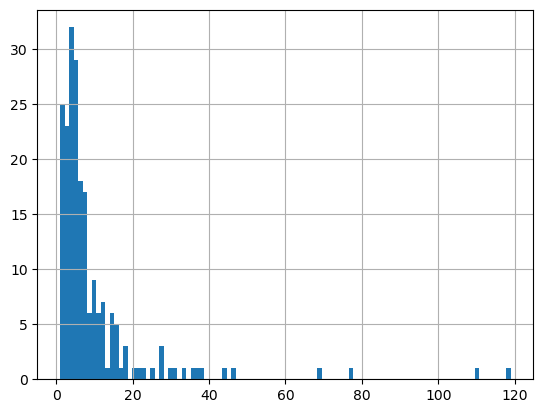

In [27]:
logos_train['count'].hist(bins=100)

<Axes: >

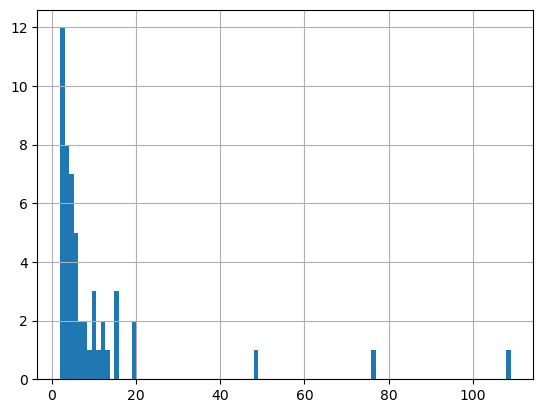

In [28]:
logos_test['count'].hist(bins=100)

In [29]:
logos_test = logos_test['filename'].unique()
logos_train = logos_train['filename'].unique()
logos_test

array(['logo_914.svg', 'logo_940.svg', 'logo_1869.svg', 'logo_308.svg',
       'logo_500.svg', 'logo_98.svg', 'logo_527.svg', 'logo_1396.svg',
       'logo_1810.svg', 'logo_1433.svg', 'logo_1958.svg', 'logo_672.svg',
       'logo_37.svg', 'logo_864.svg', 'logo_944.svg', 'logo_1970.svg',
       'logo_153.svg', 'logo_707.svg', 'logo_1517.svg', 'logo_842.svg',
       'logo_1995.svg', 'logo_357.svg', 'logo_1801.svg', 'logo_55.svg',
       'logo_324.svg', 'logo_548.svg', 'logo_433.svg', 'logo_1985.svg',
       'logo_1110.svg', 'logo_1184.svg', 'logo_1446.svg', 'logo_7.svg',
       'logo_1637.svg', 'logo_1758.svg', 'logo_36.svg', 'logo_231.svg',
       'logo_680.svg', 'logo_447.svg', 'logo_1584.svg', 'logo_1080.svg',
       'logo_535.svg', 'logo_718.svg', 'logo_1744.svg', 'logo_1158.svg',
       'logo_1681.svg', 'logo_1502.svg', 'logo_1307.svg', 'logo_1141.svg',
       'logo_1359.svg', 'logo_1131.svg', 'logo_1797.svg', 'logo_1723.svg'],
      dtype=object)

### Discussion
- One might also stratify over used animation types.
- Are there enough good animations in the dataset for logos with lots of paths? -> Manual annotation

## Animation Dataset

In [30]:
import pickle
import pandas as pd

# Load the pickle file
with open("data/surrogate_model/animation_label.pkl", "rb") as f:
    imported_pickle = pickle.load(f)

# Create a DataFrame from the imported data
filtered_data = pd.DataFrame(imported_pickle, columns=["file", "animation_id", "model_output", "label"])

filtered_data = pd.read_csv("data/animated_svgs_dataframes/firebase_animations.csv", sep=";").rename(columns={"filename":"file", "rating" : "label"})

# Define the mapping for ratings
#mapping_dict = {"Very Good": 6, "Good": 5, "Okay": 4, "Bad": 3, "Very Bad": 2, "no_rating": 1}
# Replace the 'label' column with the corresponding ratings using .map
#filtered_data['rating'] = filtered_data['label'].map(mapping_dict)
filtered_data['rating'] = filtered_data['label']

# Extract unique logos by splitting 'file' with "_animation" and using .str.get(0)
#logos_unique = filtered_data['file'].str.split('_animation').str.get(0).unique()

In [31]:
#example
filtered_data[filtered_data["file"].str.contains("logo_5_")]

,Unnamed: 0,id,file,label,animation_id,model_output,rating


### Consistency: Delete twice animated paths in one animation
Every animation should animate each path only once. **But there are duplicates.**
Some duplicates are completely equal.

In [56]:
# Example
filtered_data[filtered_data['file'] == "logo_379_animation_5"]
filtered_data.head()

,Unnamed: 0,id,file,label,animation_id,model_output,rating,average_rating,include
0,0,0,logo_1006.svg,2,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",2,2.0,0
1,1,0,logo_1006.svg,2,2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,2.0,0
2,2,0,logo_1006.svg,2,4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,2.0,0
3,3,1,logo_1017.svg,3,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",3,3.0,0
4,4,1,logo_1017.svg,3,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",3,3.0,0


In [33]:
# SIMPLE DUPLICATE REDUCTION
print(f"There are {filtered_data.duplicated(subset=['file', 'animation_id'], keep=False).sum()} duplicates.")

# Create a copy for and convert numpy to strings
duplicate_search = filtered_data.copy()
duplicate_search['model_output'] = duplicate_search['model_output'].apply(lambda x: str(x))

# Find duplicates in the copy and remove with a mask
duplicates_mask = duplicate_search.duplicated(keep='first')
filtered_data = filtered_data[~duplicates_mask]

print(f"Reduced to {filtered_data.duplicated(subset=['file', 'animation_id'], keep=False).sum()} duplicates.")

There are 1345 duplicates.
Reduced to 1345 duplicates.


But there are some more duplicates. Some have different ratings, so let's simply keep the better rating:

In [34]:
duplicates_mask = filtered_data.duplicated(subset=['file', 'animation_id'], keep=False)
filtered_data[duplicates_mask]

,Unnamed: 0,id,file,label,animation_id,model_output,rating
5,5,1,logo_1017.svg,3,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",3
6,6,1,logo_1017.svg,3,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",3
8,8,2,logo_1026.svg,1,4,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
10,10,2,logo_1026.svg,1,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1
14,14,3,logo_1029.svg,2,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",2
...,...,...,...,...,...,...,...
3070,3070,388,logo_959.svg,1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",1
3071,3071,388,logo_959.svg,1,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",1
3072,3072,388,logo_959.svg,1,2,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1
3079,3079,391,logo_995.svg,0,8,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [35]:
# Sort the DataFrame by 'file', 'animation_id' (for grouping) and 'rating' (descending order to prioritize higher ratings)
filtered_data_sorted = filtered_data.sort_values(by=['file', 'animation_id', 'rating'], ascending=[True, True, False])

# Mark duplicates, keeping the row with the highest rating
duplicates_mask = filtered_data_sorted.duplicated(subset=['file', 'animation_id'], keep='first')

# Identify the indices of rows to keep and filter the original DataFrame
indices_to_keep = filtered_data_sorted[~duplicates_mask].index

filtered_data = filtered_data.loc[filtered_data.index.intersection(indices_to_keep)]

print(f"Reduced to {filtered_data.duplicated(subset=['file', 'animation_id'], keep=False).sum()} duplicates.")

Reduced to 0 duplicates.


Now all duplicates are gone. Let's check with an example:

In [36]:
# Check: Should be 7 animations instead of 14 
filtered_data[filtered_data['file'] == "logo_379_animation_5"]  # EG: logo_379_animation_5 , logo_334_animation_12

,Unnamed: 0,id,file,label,animation_id,model_output,rating


In [37]:
filtered_data.reset_index(drop=True, inplace=True)

### Some Statistics about the Animations we have here
Result: Many animations with only one animated path

In [38]:
grouped = filtered_data.groupby('file').count()
grouped = grouped[['animation_id']]
print(f"{grouped.size} Animations initially")
histogram_table = grouped['animation_id'].value_counts().reset_index()
histogram_table.columns = ['Animation Length', 'Count']
histogram_table = histogram_table.sort_values(by='Animation Length')
print(histogram_table)

393 Animations initially
    Animation Length  Count
0                  1    112
1                  2     93
2                  3     61
3                  4     33
4                  5     20
5                  6     13
6                  7      9
10                 8      4
8                  9      6
12                10      3
9                 11      4
7                 12      8
15                13      2
13                14      2
19                15      1
25                16      1
28                17      1
21                19      1
11                21      3
14                24      2
30                28      1
16                30      2
27                32      1
26                33      1
20                41      1
31                47      1
32                50      1
17                56      1
29                57      1
18                94      1
23               103      1
24               150      1
22               255      1


In [39]:
grouped = filtered_data.groupby('label').count()
grouped = grouped[['file']].reset_index()
grouped.columns = ['Rating', 'Count']
grouped['Percentage'] = (grouped['Count'] / grouped['Count'].sum()) * 100
grouped

,Rating,Count,Percentage
0,0,359,15.289608
1,1,540,22.998296
2,2,466,19.846678
3,3,547,23.296422
4,4,436,18.568995


### Investigate overall rating of animations

<Axes: >

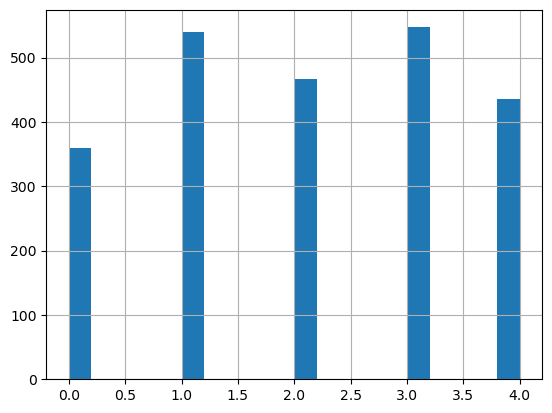

In [40]:
filtered_data['average_rating'] = filtered_data.groupby('file')['rating'].transform('mean')
filtered_data['average_rating'].hist(bins=20)

In [41]:
# example
filtered_data[filtered_data["file"].str.contains("logo_5_")]

,Unnamed: 0,id,file,label,animation_id,model_output,rating,average_rating


### Now pick good Animations only
Pick the following animations
- Best per logo (include as many different logos as possible)
- Add all GOOD animations (additionally add as many animations as possible) TODO: Implement later

In [42]:
filtered_data['include'] = 0

In [43]:
# use all animations with an average rating over 3
minimum_rating = 3
temp = filtered_data['average_rating'] > minimum_rating
filtered_data.loc[temp, 'include'] = 1

In [44]:
print(f"{filtered_data['include'].mean() * 100}% of the data is left out")

18.56899488926746% of the data is left out


In [45]:
# go through each logo to find the best animation
for logo in logos:
    # make a data frame that contains all the animations of one logo
    temp = filtered_data[filtered_data["file"].str.contains(logo)]

    best_logo = temp[temp['average_rating'] == temp['average_rating'].max()]
    best_logo = best_logo['file'].unique()
    
    filtered_data.loc[filtered_data['file'].isin(best_logo), 'include'] = 1
    break

In [46]:
print(f"Now {filtered_data['include'].mean() * 100}% of the data is left out")

Now 18.56899488926746% of the data is left out


Note: No additional animations are selected

In [47]:
best_output = filtered_data[filtered_data['include'] == 1].copy()
best_output.drop(columns=['include'], inplace=True, axis=1)

In [48]:
# extract logo
pattern = r'(logo_\d+)'
best_output['filename'] = best_output['file'].str.extract(pattern)

### Numeration to keep order later (corresponds to start-time)

In [49]:
# Create a time_offset column filled with zeros
best_output['a13'] = 0.0

# Define animation start time offset in seconds from animation start
TIME_OFFSET_STEP = 0.25

# Initialize a dictionary to store numbering for each file
file_counts = {}

# Iterate through the "file" column and number each unique file
for index, row in best_output.iterrows():
    filename = row['file']
    if filename not in file_counts:
        file_counts[filename] = 1
    else:
        file_counts[filename] += 1
    best_output.at[index, 'a13'] = file_counts[filename] * TIME_OFFSET_STEP
best_output.head()

,Unnamed: 0,id,file,label,animation_id,model_output,rating,average_rating,filename,a13
53,62,19,logo_11.svg,4,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,4.0,logo_11,0.25
108,150,26,logo_1145.svg,4,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",4,4.0,logo_1145,0.25
109,151,26,logo_1145.svg,4,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",4,4.0,logo_1145,0.50
127,171,30,logo_1159.svg,4,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,4.0,logo_1159,0.25
128,172,31,logo_1160.svg,4,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",4,4.0,logo_1160,0.25


### Stat: Animated paths per logo

In [50]:
used_paths = best_output[["filename", "animation_id"]].drop_duplicates(
    subset = ['filename', 'animation_id'], keep = 'last').reset_index(drop = True)
used_paths.head()

,filename,animation_id
0,logo_11,0
1,logo_1145,1
2,logo_1145,2
3,logo_1159,0
4,logo_1160,1


array([[<Axes: title={'center': 'animation_id'}>]], dtype=object)

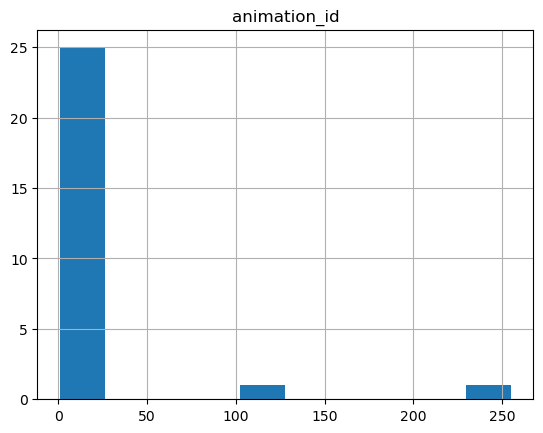

In [51]:
used_paths.groupby(['filename']).count().hist()

### Some Statistics again


In [52]:
grouped = best_output.groupby('file').count()
grouped = grouped[['animation_id']]
print(f"{grouped.size} Animations left over")
histogram_table = grouped['animation_id'].value_counts().reset_index()
histogram_table.columns = ['Animation Length', 'Count']
histogram_table = histogram_table.sort_values(by='Animation Length')
print(histogram_table)

27 Animations left over
   Animation Length  Count
0                 1     14
2                 2      2
1                 3      3
3                 5      2
6                 8      1
7                 9      1
5                11      1
4                13      1
8               103      1
9               255      1


# Build sequences

## Make List of all Data Samples

### Apply Stats

In [53]:
final_animation_stats = best_output[['filename', 'file', 'model_output']].copy()
final_animation_stats['animation_length'] = 1
for i in range(6):
 final_animation_stats[f'a{i+1}'] = final_animation_stats['model_output'].apply(lambda x: x[i])
final_animation_stats.drop(['model_output'], inplace=True, axis=1)
final_animation_stats

,filename,file,animation_length,a1,a2,a3,a4,a5,a6
53,logo_11,logo_11.svg,1,[,0,.,0,",",
108,logo_1145,logo_1145.svg,1,[,0,.,0,",",
109,logo_1145,logo_1145.svg,1,[,0,.,0,",",
127,logo_1159,logo_1159.svg,1,[,0,.,0,",",
128,logo_1160,logo_1160.svg,1,[,0,.,0,",",
...,...,...,...,...,...,...,...,...,...
2043,logo_7,logo_7.svg,1,[,0,.,0,",",
2044,logo_7,logo_7.svg,1,[,0,.,0,",",
2078,logo_72,logo_72.svg,1,[,0,.,0,",",
2237,logo_914,logo_914.svg,1,[,0,.,0,",",


### Group by logo & animation

In [54]:
final_animations_index = final_animation_stats.groupby(['filename', 'file']).sum()
final_animations_index['a0'] = 1 # EOS one per animation sequence
final_animations_index = final_animations_index.reset_index()
final_animations_index

C:\Users\Okan\AppData\Local\Temp\ipykernel_3428\483758347.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_animations_index = final_animation_stats.groupby(['filename', 'file']).sum()


,filename,file,animation_length,a0
0,logo_11,logo_11.svg,1,1
1,logo_1145,logo_1145.svg,2,1
2,logo_1159,logo_1159.svg,1,1
3,logo_1160,logo_1160.svg,2,1
4,logo_1181,logo_1181.svg,1,1
5,logo_1230,logo_1230.svg,1,1
6,logo_1247,logo_1247.svg,13,1
7,logo_1303,logo_1303.svg,11,1
8,logo_1411,logo_1411.svg,1,1
9,logo_1450,logo_1450.svg,1,1


### Balance and Oversampling

In [55]:
final_animations_index['repeat'] = 1

def print_balancing_stats(df: pd.DataFrame, silent=False):
    temp = df.copy()
    temp = temp[~temp['filename'].isin(logos_test)] # train data only
    temp = temp.reset_index().drop(['filename', 'file','animation_length'], axis=1)
    for i in range(0, 7):
        temp[f'a{i}'] = temp[f'a{i}'] * temp['repeat']
    balance = temp[['a1', 'a2', 'a3', 'a4', 'a5', 'a6']].sum()
    balance_percentage = min(balance) / max(balance)
    balance_diff = max(balance) - min(balance)
    if silent:
        return balance_diff, balance_percentage, balance.nsmallest(6).index
    print(f"Balanced with oversampling {int(temp['repeat'].sum() / len(temp) * 100)-100}% to {int(balance_percentage * 100)}%")
    print(balance)
    
print_balancing_stats(final_animations_index)

KeyError: 'a1'

In [ ]:
print_balancing_stats(final_animations_index, silent=True)

Currently, EOS (a0) occurs much more often then the other animation types.

Let's oversample all sequences > 1

In [ ]:
final_animations_index[final_animations_index['filename'] == 'logo_2']

Through oversampling, this can be optimized...

In [ ]:
# Very fancy sampling
def get_filter_mask(df, rare_animations, second_rarest=False, second_most_frequent=False, max_repetition=8):
    if second_rarest and second_most_frequent:
        return df.loc[(df[rare_animations[0]] > 0) & 
                      (df[rare_animations[1]] > 0) &
                      (df[rare_animations[4]] == 0) &
                      (df[rare_animations[5]] == 0) &
                      (df['repeat'] < df['animation_length'] + 2) &
                      (df['repeat'] < max_repetition)]
    if second_rarest and not second_most_frequent:
        return df.loc[(df[rare_animations[0]] > 0) & 
                      #(df[rare_animations[1]] > 0) &
                      (df[rare_animations[4]] == 0) &
                      (df[rare_animations[5]] == 0) &
                      (df['repeat'] < df['animation_length'] + 2) &
                      (df['repeat'] < max_repetition)]
    if not second_rarest and second_most_frequent:
        return df.loc[(df[rare_animations[0]] > 0) & 
                      (df[rare_animations[1]] > 0) &
                      #(df[rare_animations[4]] == 0) &
                      (df[rare_animations[5]] == 0) &
                      (df['repeat'] < df['animation_length'] + 2) &
                      (df['repeat'] < max_repetition)]
    return df.loc[(df[rare_animations[0]] > 0) & 
                  #(df[rare_animations[1]] > 0) &
                  #(df[rare_animations[4]] == 0) &
                  (df[rare_animations[5]] == 0) &
                  (df['repeat'] < df['animation_length'] + 2) &
                  (df['repeat'] < max_repetition)]

final_animations_index['repeat'] = 1
sample_size = 5

for i in range(1000):
    balance_diff, balance, rare_animations = print_balancing_stats(final_animations_index, silent=True)
    if balance_diff < 20:
        sample_size = 1
        filtering = get_filter_mask(final_animations_index, rare_animations, second_most_frequent=True, max_repetition=8)

    else:
        filtering = get_filter_mask(final_animations_index, rare_animations, second_rarest=True, second_most_frequent=True, max_repetition=6)
        if len(filtering == 0):
            filtering = get_filter_mask(final_animations_index, rare_animations, second_most_frequent=True, max_repetition=7)
            if len(filtering == 0):
                filtering = get_filter_mask(final_animations_index, rare_animations, max_repetition=8)
            
    if balance_diff < 20:
        print(f"Final oversampling: {balance_diff} difference, {len(filtering)} in filtering")
    if balance_diff < 2:
        print(f"Break after {i} Iterations")
        break

    random_indices = filtering.sample(n=min(sample_size, len(filtering))).index.tolist()
    final_animations_index.loc[random_indices, 'repeat'] += 1
    
print_balancing_stats(final_animations_index)

In [ ]:
final_animations_index['repeat'].hist(bins=20)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the two columns for the scatter plot
x = final_animations_index['repeat']
y = final_animations_index['animation_length']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Oversampling')
plt.ylabel('Animation Length')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [ ]:
final_animations_index[final_animations_index['filename'] == 'logo_2']

### Merge logo stats

In [ ]:
logos.head()

In [ ]:
final_animations_index = final_animations_index.merge(logos[["filename","count"]], on='filename', how='left')
final_animations_index.rename(columns={'count': 'num_paths'}, inplace=True)
final_animations_index

### Plot: Number of Paths vs Animation Length

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the two columns for the scatter plot
x = final_animations_index['num_paths']
y = final_animations_index['animation_length']

# Create a scatter plot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Number of Paths')
plt.ylabel('Animation Length')
plt.title('Scatter Plot')

# Show the plot
plt.show()

## Bucketing
For batching the data later on, build buckets to group animations with similar length characteristics

In [ ]:
# from dataset_helper import generate_buckets_2D
# generate_buckets_2D(final_animations_index,
#                  'count',
#                  'animation_length',
#                  [0.2, 0.4, 0.6, 0.8, 1],
#                  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Build Input Sequences Dictionary

In [ ]:
def build_input_sequences_dict(sequences: pd.DataFrame, used_paths: pd.DataFrame, is_used_path_filtering = False, keep_unused=False):
    initial_length = len(sequences)
    used_paths['animation_id'] = used_paths['animation_id'].astype(str)
    
    if is_used_path_filtering:
        if keep_unused:
            # If keeping unused paths, perform a left merge and then filter where used paths are NaN
            sequences = pd.merge(sequences, used_paths, on=['filename', 'animation_id'], how='left', indicator=True)
            sequences = sequences[sequences['_merge'] == 'left_only'].drop(columns=['_merge']).copy()
            print(f"Filtering of input sequences to keep only unused paths. Reduction from {initial_length} to {len(sequences)} paths.")
        else:
            # If not keeping unused paths, perform an inner merge to keep only used paths
            sequences = pd.merge(sequences, used_paths, on=['filename', 'animation_id']).copy()
            print(f"Filtering of input sequences on only used paths. Reduction from {initial_length} to {len(sequences)} paths.")

    dict = {}
    for logo in sequences["filename"].unique():
        dict[logo] = sequences[sequences["filename"]==logo]
    
    return dict

In [ ]:
input_sequences_dict_used = build_input_sequences_dict(input_sequences, used_paths, is_used_path_filtering=True)
input_sequences_dict_used[logos_train[0]]

In [ ]:
input_sequences_dict_unused = build_input_sequences_dict(input_sequences, used_paths, is_used_path_filtering=True, keep_unused=True)
input_sequences_dict_unused[logos_train[0]]

## Build Output Sequence (Embedded Paths with Animation Vector)

In [ ]:
# Merge Dataframes
output_sequence = pd.merge(best_output, embeddings, on=['filename', 'animation_id'], how='inner')
animation_vectors = pd.DataFrame(output_sequence["model_output"].to_list(), columns=["a1","a2","a3","a4","a5","a6","a7","a8","a9","a10","a11","a12"])
output_sequence.drop(['animation_id', 'model_output', 'label', 'rating', 'average_rating'], inplace=True, axis=1)
output_sequence['a0'] = 0 # EOS Feature in One-hot Encoding
output_sequence = pd.merge(output_sequence, animation_vectors, left_index=True, right_index=True)

In [ ]:
# Move column 'a13' to the back
column_to_move = 'a13'
new_order = [col for col in output_sequence.columns if col != column_to_move]
new_order.append(column_to_move)
output_sequence = output_sequence[new_order]

In [ ]:
output_sequence.head()

## Main Iteration over all samples

In [ ]:
from dataset_helper import generate_dataset

dataset = generate_dataset(final_animations_index,
                           input_sequences_dict_used,
                           input_sequences_dict_unused,
                           output_sequence,
                           {"train": logos_train, "test": logos_test},
                           sequence_length_input=8, # low as filtered
                           sequence_length_output=10, # input + SOS / EOS
                           )
# Executed in 1 minute with shortened padding ~Cornelius

## Result

In [ ]:
torch.save(dataset["train"]["input"], 'data/prototype_dataset/train_sequence_input.pt')
torch.save(dataset["train"]["output"], 'data/prototype_dataset/train_sequence_output.pt')
torch.save(dataset["test"]["input"], 'data/prototype_dataset/test_sequence_input.pt')
torch.save(dataset["test"]["output"], 'data/prototype_dataset/test_sequence_output.pt')

In [ ]:
print(dataset["train"]["input"].size())
print(dataset["train"]["output"].size())
print(dataset["test"]["input"].size())
print(dataset["test"]["output"].size())